In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cartopy as cart
import cartopy.crs as ccrs
import cmocean.cm as cmo
import seaborn as sns
from glob import glob

# import pickle as pkl
# import pandas as pd

In [5]:
%load_ext autoreload
%autoreload 2
%load_ext version_information
%version_information numpy, matplotlib, cartopy, cmocean, seaborn, glob

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.6.13 64bit [GCC Clang 11.0.1]
IPython 7.16.1
OS Darwin 20.3.0 x86_64 i386 64bit
numpy 1.19.5
matplotlib 3.3.4
cartopy 0.19.0
cmocean 2.0
seaborn 0.11.2
glob The 'glob' distribution was not found and is required by the application
Thu Feb 17 15:02:27 2022 CET

## Bathymetry data

https://www.naturalearthdata.com/downloads/10m-physical-vectors/10m-bathymetry/

Just Download All the data. 

In [6]:
shp_dict = {}
files = glob('../data/ne_10m_bathymetry_all/*.shp')
assert len(files) > 0
files.sort()
for f in files:
    depth = f.split('_')[-1].split('.')[0]
    # depth = '-' + f.split('_')[-1].split('.')[0]
    # depths.append(depth)
    nei = cart.io.shapereader.Reader(f)
    shp_dict[depth] = nei


In [9]:
depths = [d for d in shp_dict.keys()][::-1]
colors = sns.mpl_palette('cmo.ice_r',n_colors=8)
cmap   = sns.mpl_palette('cmo.ice',n_colors=8,as_cmap=True)

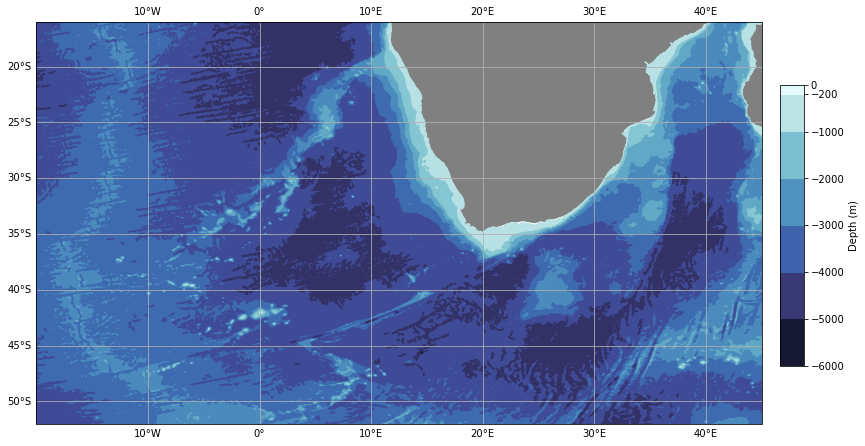

In [10]:
fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-20, 45, -52, -16), crs=ccrs.PlateCarree())

i = 0
for depth in depths[:8]:
    ax.add_geometries(shp_dict[depth].geometries(),crs=ccrs.PlateCarree(),color=colors[i])
    i+=1
# ax.set_facecolor('grey')
# ax.add_feature(cart.feature.LAND,color='grey')
ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='LAND',scale='110m'),color='grey',
              zorder=0)
# ax.coastlines(lw=1,resolution='110m')
gl = ax.gridlines(draw_labels=True)
gl.right_labels = False

# Add custom colorbar
axi = fig.add_axes([0.92,0.35,0.025,0.3])
# axi = fig.add_axes([0.8,0.2,0.025,0.6])
norm = matplotlib.colors.Normalize(vmin=-6000,vmax=0)
cbar = matplotlib.colorbar.ColorbarBase(ax=axi,cmap=cmap,norm=norm,
        boundaries=(-np.array(depths[:8]).astype(int)).tolist()[::-1],
        ticks=-np.array(depths).astype(int),
        spacing='proportional',
        extend='neither',
        label='Depth (m)'
        )


# ax.plot(sampling_locs['longitude'], 
#            sampling_locs['latitude'],
#            zorder=5, color='yellow' )
# ax.scatter(sampling_locs['longitude'], 
#            sampling_locs['latitude'],
#            zorder=5, color='yellow', label='Sampling locs.')
# ax.legend(loc='upper left', shadow=True, fontsize=12)